#This is the part (3) of our project.

#Import modules

In [15]:
#  Import the neccessary modules
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import time
import datetime
from datetime import datetime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
train1 = pd.read_csv(r"drive/MyDrive/CSV/feature_vector.csv")

In [27]:
#Normalization Layer

max1=-1
for line in train1.NumberOfComments:
  max1=max1 if max1>int(line) else int(line)
print(max1)

max2=-1
for line in train1.PageRank:
  max2=max2 if max2>float(line) else float(line)
print(max2)

max3=-1
for line in train1.DegreeCentrality:
  max3=max3 if max3>float(line) else float(line)
print(max3)

max4=-1
for lines in train1.Date:
  line=datetime.timestamp(datetime.strptime(lines, '%Y-%m-%d %H:%M:%S'))
  max4=max4 if max4>float(line) else float(line)
print(max4)

arr=[]
for x,y,z,a,b,c,d,e in zip(train1.PostID,train1.Title,train1.Date,train1.NumberOfComments,train1.SentimentScore,train1.PageRank,train1.DegreeCentrality,train1.Score):
  #Conversion of date to timestamp UTC
  date1=datetime.timestamp(datetime.strptime(z, '%Y-%m-%d %H:%M:%S'))/max4
  temp=[x,y,date1,a/max1,b,c/max2,d/max3,e]
  arr.append(temp)

7918
0.01197926563148102
0.02710004181525176
1580408970.0


In [28]:
print(len(arr))

31231


In [29]:
train=pd.DataFrame(arr,columns=["PostID","Title","Date","NumberOfComments","SentimentScore","PageRank","DegreeCentrality","Score"])

In [30]:
!ls

drive  sample_data


In [31]:
train.head()
# print(train.to_string())

,PostID,Title,Date,NumberOfComments,SentimentScore,PageRank,DegreeCentrality,Score
0,ei7nwx,How i celebrate New years,0.998362,0.000000,1,0.000105,0.000000,1
1,ei7o1k,The Elder Scrolls Online,0.998362,0.000505,0,0.000511,0.001040,1
2,ei7oio,"THIS SHOULD BE POSTED IN MOBILE GAMING, BUT TH...",0.998362,0.000000,0,0.000105,0.550624,0
3,ei7rxa,"They say, ""The wat you spend New Year\'s Eve i...",0.998363,0.000253,1,0.000105,0.550624,6
4,ei7vkp,This game is ruining me (AI Dungeon 2),0.998363,0.000000,-1,0.000105,0.550624,1


In [32]:
labels = train.pop("Score")
train.pop("PostID")
train.pop("Title")
# print(labels.to_string())

0                                How i celebrate New years
1                                 The Elder Scrolls Online
2        THIS SHOULD BE POSTED IN MOBILE GAMING, BUT TH...
3        They say, "The wat you spend New Year\'s Eve i...
4                   This game is ruining me (AI Dungeon 2)
                               ...                        
31226                    FiVeM Lua EXECUTOR (2020) PL[ENG]
31227      Best recent Magic the Gathering set for sealed?
31228                         Who knows what game this is?
31229    [KH3 Re:Mind] Xehanort makes the secret boss k...
31230    Easter Eggs in Reality - Have you guys seen this?
Name: Title, Length: 31231, dtype: object

In [10]:
# def convert(data):
#     number = preprocessing.LabelEncoder()
#     data['Date'] = number.fit_transform(data.Date)
#     # data=data.fillna(-999)
#     return data

# train = convert(train)
# train

In [33]:
# Split the Dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.10)

In [34]:
#x_train.describe()
y_train.describe()
print(y_train)
# print(type(x_train))
# x_train.shape

13441    1
11771    1
26077    1
8588     1
3366     1
        ..
12635    1
13294    1
18503    1
7916     1
30057    0
Name: Score, Length: 28107, dtype: int64


In [35]:
# Build the Neural network
mymodel = Sequential()
mymodel.add(Dense(5, input_dim=5,activation='relu'))
mymodel.add(Dense(8, activation='relu'))
mymodel.add(Dense(1, activation='sigmoid'))

In [36]:
opt = keras.optimizers.Adam(learning_rate=0.001)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2)
]
mymodel.compile(optimizer='adam',
             loss='mean_squared_error')

# In this step, we train the model by feeding the inputs through the model.
history=mymodel.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
791/791 [==============================] - 2s 2ms/step - loss: 750753.9375 - val_loss: 104620.1719
Epoch 2/50
791/791 [==============================] - 1s 2ms/step - loss: 750744.9375 - val_loss: 104616.0391
Epoch 3/50
791/791 [==============================] - 1s 2ms/step - loss: 750738.3125 - val_loss: 104614.3516
Epoch 4/50
791/791 [==============================] - 1s 1ms/step - loss: 750736.8125 - val_loss: 104613.8984
Epoch 5/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.3750 - val_loss: 104613.7109
Epoch 6/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.6250 - val_loss: 104613.6562
Epoch 7/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.9375 - val_loss: 104613.6250
Epoch 8/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.2500 - val_loss: 104613.6250
Epoch 9/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.0000 - val_loss: 104613.5859
Epoch 10/5

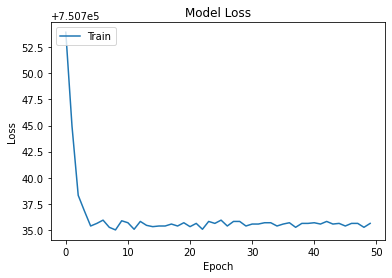

In [38]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

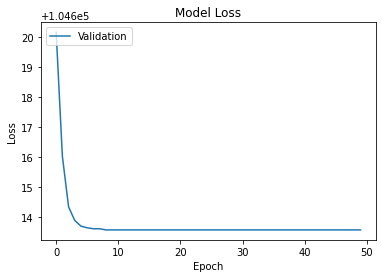

In [39]:
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [40]:
# Step 7: Evaluate the Models
# We check the peformance of the model based on the test dataset.
mymodel.evaluate(x_test, y_test)
mymodel.evaluate(x_train, y_train)


879/879 [==============================] - 1s 1ms/step - loss: 686116.0625


686116.0625

In [41]:
# Build the Neural network
mymodel = Sequential()
mymodel.add(Dense(5, input_dim=5,activation='relu'))
mymodel.add(Dense(8, activation='relu'))
mymodel.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)

mymodel.compile(optimizer='adam',
             loss='mean_squared_error')

# In this step, we train the model by feeding the inputs through the model.
history=mymodel.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
791/791 [==============================] - 2s 2ms/step - loss: 750742.7500 - val_loss: 104615.6016
Epoch 2/50
791/791 [==============================] - 1s 2ms/step - loss: 750737.4375 - val_loss: 104614.0781
Epoch 3/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.6875 - val_loss: 104613.7344
Epoch 4/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.2500 - val_loss: 104613.6562
Epoch 5/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.8125 - val_loss: 104613.6250
Epoch 6/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.1250 - val_loss: 104613.5859
Epoch 7/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.2500 - val_loss: 104613.5859
Epoch 8/50
791/791 [==============================] - 1s 2ms/step - loss: 750735.0000 - val_loss: 104613.5859
Epoch 9/50
791/791 [==============================] - 1s 1ms/step - loss: 750735.9375 - val_loss: 104613.5859
Epoch 10/5

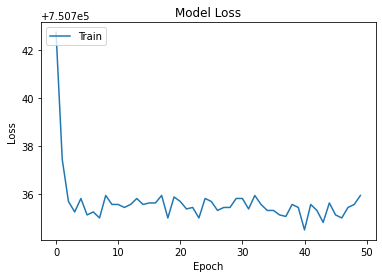

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()